In [ ]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT_DIR = Path.cwd().parent.parent.parent
PROJECT_ROOT_DIR

file_paths_passing  = ["/data/processed/bundesliga/passing.csv",
               "/data/processed/la_liga/passing.csv",
               "/data/processed/ligue_1/passing.csv",
               "/data/processed/premier_league/passing.csv",
               "/data/processed/serie_a/passing.csv", 
               ]

file_paths_standard_stats  = ["/data/standard_stats_bundesliga.csv",
            "/data/standard_stats_la_liga.csv",
            "/data/standard_stats_ligue_1.csv",
            "/data/standard_stats_premier_league.csv",
            "/data/standard_stats_serie_a.csv",
            ]

PROJECT_ROOT_DIR

passing = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_passing:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    passing = pd.concat([passing, temp_df], ignore_index=True)
passing = passing.set_index("player")

standard_stats = pd.DataFrame()

# Loop through each file, load the DataFrame, and concatenate
for file in file_paths_standard_stats:
    temp_df = pd.read_csv(f"{PROJECT_ROOT_DIR}{file}")  # Load DataFrame from CSV file
    standard_stats = pd.concat([standard_stats, temp_df], ignore_index=True)
standard_stats = standard_stats.set_index("player")

passing

,passes_total,passes_completed,passes_from_attacking_third,passes_from_middle_third,passes_from_defending_third,passes_from_the_box,passes_into_attacking_third,passes_into_box,passes_into_box_completed,passes_into_goal_area,...,up_passes_progressive_completed_per_match,up_passes_horizontal_per_match,up_passes_horizontal_completed_per_match,up_passes_backward_per_match,up_passes_backward_completed_per_match,up_passes_long_vertical_per_match,up_passes_long_vertical_from_defending_third_per_match,up_passes_long_vertical_from_mid_third_per_match,up_passes_long_vertical_from_mid_third_into_the_box_per_match,up_key_passes_per_match
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,870.0,625.0,338.0,455.0,77.0,19.0,382.0,109.0,44.0,22.0,...,0.422,0.344,0.344,0.778,0.700,0.078,0.078,0.067,0.022,0.067
Adam Hloušek,206.0,157.0,9.0,95.0,102.0,1.0,48.0,1.0,0.0,0.0,...,0.111,0.000,0.000,0.000,0.000,0.089,0.089,0.022,0.000,0.000
Adelino André Vieira Freitas,1304.0,977.0,426.0,683.0,195.0,21.0,563.0,143.0,48.0,9.0,...,0.678,0.322,0.322,0.844,0.733,0.111,0.111,0.056,0.000,0.022
Admir Mehmedi,564.0,424.0,282.0,234.0,48.0,27.0,302.0,54.0,28.0,11.0,...,0.367,0.189,0.189,0.767,0.578,0.033,0.033,0.011,0.000,0.022
Adnan Januzaj,57.0,42.0,43.0,13.0,1.0,3.0,44.0,16.0,8.0,0.0,...,0.078,0.044,0.044,0.100,0.078,0.000,0.000,0.000,0.000,0.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ľubomír Tupta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Łukasz Skorupski,886.0,651.0,0.0,0.0,886.0,0.0,27.0,1.0,0.0,0.0,...,0.211,0.022,0.022,0.000,0.000,0.244,0.244,0.000,0.000,0.000
Ştefan Daniel Radu,761.0,627.0,134.0,486.0,141.0,5.0,233.0,35.0,9.0,7.0,...,0.367,0.044,0.044,0.267,0.256,0.089,0.089,0.044,0.000,0.022


In [3]:
# merge both df's
df = pd.merge(left=standard_stats[["team","position","match_played","minutes_played"]],
         right=passing,
         left_index=True, 
         right_index=True,
         how="left")

df
# keep in defedning only players with min. matches played
requirement_mask = (df["match_played"] > 1) & (df["minutes_played"] > 90)
passing_columns = list(passing.columns) + ["position"]
passing = df.loc[requirement_mask, passing_columns]
df = df.loc[requirement_mask, :]

passing

,passes_total,passes_completed,passes_from_attacking_third,passes_from_middle_third,passes_from_defending_third,passes_from_the_box,passes_into_attacking_third,passes_into_box,passes_into_box_completed,passes_into_goal_area,...,up_passes_horizontal_per_match,up_passes_horizontal_completed_per_match,up_passes_backward_per_match,up_passes_backward_completed_per_match,up_passes_long_vertical_per_match,up_passes_long_vertical_from_defending_third_per_match,up_passes_long_vertical_from_mid_third_per_match,up_passes_long_vertical_from_mid_third_into_the_box_per_match,up_key_passes_per_match,position
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,870.0,625.0,338.0,455.0,77.0,19.0,382.0,109.0,44.0,22.0,...,0.344,0.344,0.778,0.700,0.078,0.078,0.067,0.022,0.067,Midfielder
Adam Hloušek,206.0,157.0,9.0,95.0,102.0,1.0,48.0,1.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.089,0.089,0.022,0.000,0.000,Defender
Adelino André Vieira Freitas,1304.0,977.0,426.0,683.0,195.0,21.0,563.0,143.0,48.0,9.0,...,0.322,0.322,0.844,0.733,0.111,0.111,0.056,0.000,0.022,Forward
Admir Mehmedi,564.0,424.0,282.0,234.0,48.0,27.0,302.0,54.0,28.0,11.0,...,0.189,0.189,0.767,0.578,0.033,0.033,0.011,0.000,0.022,Midfielder
Adnan Januzaj,57.0,42.0,43.0,13.0,1.0,3.0,44.0,16.0,8.0,0.0,...,0.044,0.044,0.100,0.078,0.000,0.000,0.000,0.000,0.067,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Édgar Osvaldo Barreto Cáceres,1025.0,843.0,217.0,623.0,185.0,9.0,324.0,35.0,10.0,6.0,...,0.189,0.189,0.711,0.622,0.100,0.100,0.067,0.022,0.022,Midfielder
Łukasz Skorupski,886.0,651.0,0.0,0.0,886.0,0.0,27.0,1.0,0.0,0.0,...,0.022,0.022,0.000,0.000,0.244,0.244,0.000,0.000,0.000,Goalkeeper
Ştefan Daniel Radu,761.0,627.0,134.0,486.0,141.0,5.0,233.0,35.0,9.0,7.0,...,0.044,0.044,0.267,0.256,0.089,0.089,0.044,0.000,0.022,Defender


In [6]:
def plot_custom_correlation_heatmap(corr_matrix, title='Feature Correlations with Player Positions'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.colors as mcolors
    colors = [
        '#67001F',  # Extremely negative (<-0.9)
        '#B2182B',  # Very strong negative (-0.9 to -0.7)
        '#D6604D',  # Strong negative (-0.7 to -0.5)
        '#F4A582',  # Moderate negative (-0.5 to -0.3)
        '#FDDBC7',  # Weak negative (-0.3 to -0.1)
        '#FFFFFF',  # Negligible (-0.1 to 0.1)
        '#D1E5F0',  # Weak positive (0.1 to 0.3)
        '#92C5DE',  # Moderate positive (0.3 to 0.5)
        '#4393C3',  # Strong positive (0.5 to 0.7)
        '#2166AC',  # Very strong positive (0.7 to 0.9)
        '#053061',  # Extremely positive (>0.9)
    ]
    
    bounds = [-1.0, -0.9, -0.7, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    norm = mcolors.BoundaryNorm(bounds, len(colors))
    cmap = mcolors.ListedColormap(colors)
    
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap=cmap,
        norm=norm,
        fmt='.2f',
        linewidth=0.5,
        xticklabels=True,
        yticklabels=True
    )
    
    cbar = plt.gca().collections[0].colorbar
    cbar.set_ticks([-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95])
    cbar.set_ticklabels([
        'Extremely\nNegative', 'Very Strong\nNegative', 
        'Strong\nNegative', 'Moderate\nNegative', 
        'Weak\nNegative', 'Negligible', 
        'Weak\nPositive', 'Moderate\nPositive',
        'Strong\nPositive', 'Very Strong\nPositive',
        'Extremely\nPositive'
    ])
    cbar.ax.tick_params(labelsize=6)

    plt.title(title)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.subplots_adjust(left=0.3)
    plt.show()

def compute_position_correlations(df, position_col='position', min_abs_corr=None):
    # Ensure position column is categorical
    df[position_col] = df[position_col].astype('category')
    
    # One-hot encode the position column
    position_dummies = pd.get_dummies(df[position_col], prefix=position_col)
    
    # Select only numerical columns
    numerical_df = df.select_dtypes(include='number')
    
    # Combine numerical and one-hot encoded data
    combined_df = pd.concat([numerical_df, position_dummies], axis=1)
    
    # Compute correlation matrix
    corr_matrix = combined_df.corr(method='pearson')
    
    # Extract correlations between numerical features and positions
    position_corr = corr_matrix[position_dummies.columns].loc[numerical_df.columns]
    
    # Filter features with at least one absolute correlation >= threshold
    if min_abs_corr is not None:
        mask = position_corr.abs().ge(min_abs_corr).any(axis=1)
        filtered_position_corr = position_corr[mask]
        return filtered_position_corr
    return position_corr


target_column = "position"
columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != target_column]
columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col != target_column]
columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != target_column and col != "match_played" and col != "minutes_played" and col != "team"]


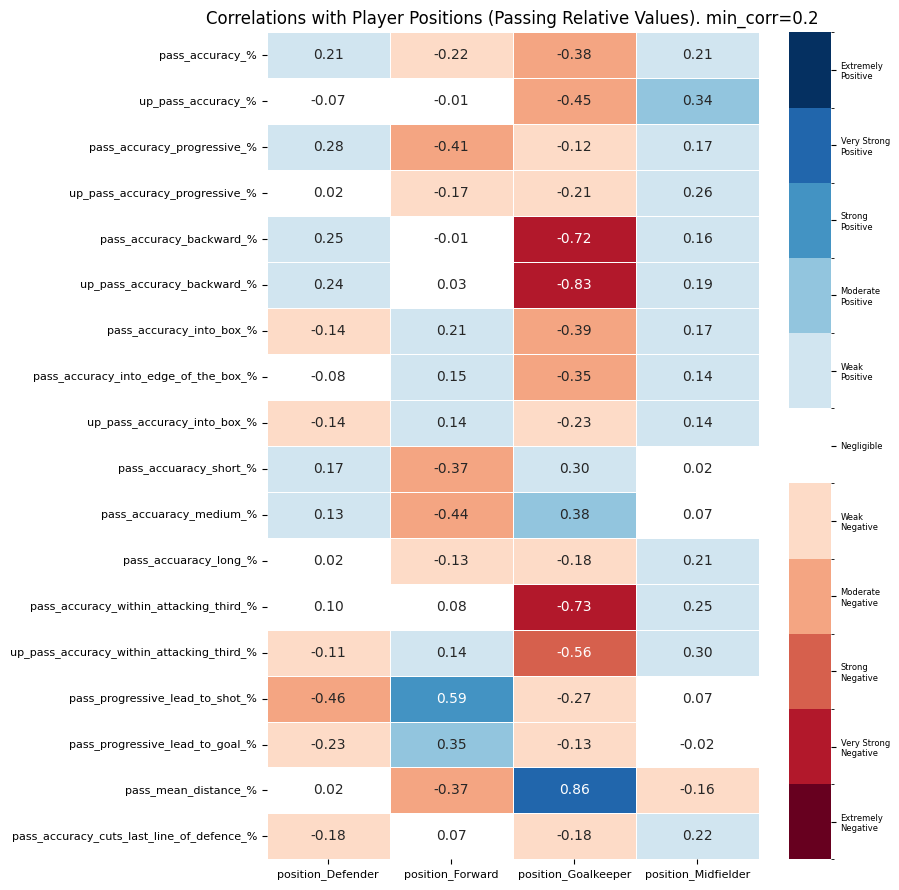

(18, 4)


In [9]:
df_columns_relative_values = passing[columns_relative_values].round(4)
df_columns_relative_values['position'] = passing['position'].astype('category')

min_corr = 0.2
position_corr = compute_position_correlations(df_columns_relative_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr, title=f'Correlations with Player Positions (Passing Relative Values). min_corr={min_corr}')
print(position_corr.shape)

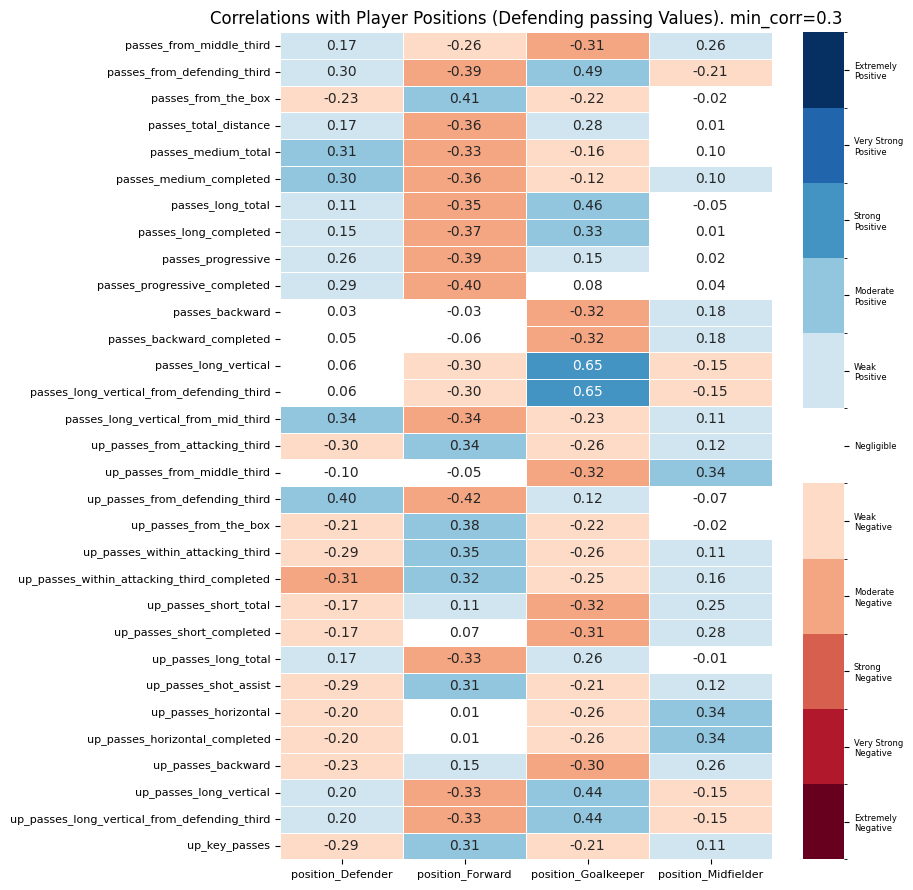

(31, 4)


In [11]:
df_absolute_values = passing[columns_absolute_values].round(4)
df_absolute_values['position'] = passing['position'].astype('category')

min_corr=0.3
position_corr = compute_position_correlations(df_absolute_values, position_col='position', min_abs_corr=min_corr)
plot_custom_correlation_heatmap(position_corr,title=f'Correlations with Player Positions (Defending passing Values). min_corr={min_corr}')
print(position_corr.shape)